__Author__: Bogdan Bintu

__Email__: bbintu@g.harvard.edu

__Date__:3/4/2020

__Platform__: Python 2.7

In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['font.family']='Arial'
import matplotlib.pyplot as plt
import numpy as np
import os

#### Please specifiy the data/save folders

In [2]:
data_folder = r'\data' #This is the folder containing the .tsv data files
save_data = r'\data'

#### Load the positions of the genomic loci imaged in the amanitin-treated cells

In [3]:
folder = data_folder

experiment = []
fid = open(folder+os.sep+r'genomic-scale-amanitin.tsv','r')
lines = np.array([ln[:-1].split('\t')for ln in fid if len(ln)>0])
fid.close()
head = list(lines[0])
experiment = np.concatenate([experiment,lines[1::2082,head.index('experiment number')].astype(int)])
zxy = np.array(lines[1:,:3][:],dtype=np.float)
zxy = zxy.reshape([-1,2082,3])/1000 #transform to um

### 1. Calculate the proximity frequency matrix for amanitin treated cells

In [5]:
import cPickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist,cdist,squareform
from tqdm import tqdm_notebook as tqdm

In [70]:
lens = [76, 80, 66, 63, 60, 55, 53, 48, 40, 43, 44, 44, 33, 30, 31, 30, 33, 33, 33, 33, 31, 31, 51]
edges = [0]+list(np.cumsum(lens))
ijs = []
for i in range(len(lens)):
    for j in range(len(lens)):
        ijs.append((i,j))
im_med = np.zeros([edges[-1],edges[-1]])
cut_offs = [0.25,0.5,0.75,1]
im_fr = np.zeros([edges[-1],edges[-1],len(cut_offs)])
im_med_trans = []
im_med_cis = []
im_fr_trans = [[] for _ in cut_offs]
im_fr_cis = [[] for _ in cut_offs]

for i,j in tqdm(ijs):
    arr = []
    for st1 in [0,edges[-1]]:
        for st2 in [0,edges[-1]]:
            zxy1 = zxy[:,st1+edges[i]:st1+edges[i+1]]
            zxy2 = zxy[:,st2+edges[j]:st2+edges[j+1]]
            arr =arr+[cdist(zxy1[k],zxy2[k]) for k in range(len(zxy1))]
    arr = np.array(arr)
    im_med[edges[i]:edges[i+1],edges[j]:edges[j+1]]=np.nanmedian(arr,axis=0)
    if i==j:
        im_med_cis.append(np.nanmedian(arr[::2],axis=0))
        im_med_trans.append(np.nanmedian(arr[1::2],axis=0))
    for ic,cutoff in enumerate(cut_offs):
        im_fr[edges[i]:edges[i+1],edges[j]:edges[j+1],ic] = 1.*np.sum(arr<cutoff,0)/np.sum(arr>-1,0)
        if i==j:
            im_fr_trans[ic].append(1.*np.sum(arr[1::2]<cutoff,0)/np.sum(arr[1::2]>-1,0))
            im_fr_cis[ic].append(1.*np.sum(arr[::2]<cutoff,0)/np.sum(arr[::2]>-1,0))
pickle.dump([im_med,im_fr,im_med_trans,im_med_cis,im_fr_trans,im_fr_cis,len(zxy)],
        open(save_data+r'/mat_contact_IMR90_amanitin.pkl','wb'))

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


In [6]:
im_med,im_fr,im_med_trans,im_med_cis,im_fr_trans,im_fr_cis,nlen=  pickle.load(
    open(save_data+r'/mat_contact_IMR90_amanitin.pkl','rb'))

### 2. Compare the trans-chromosomal proximity frequency for A and B regions for amanitin treated cells

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


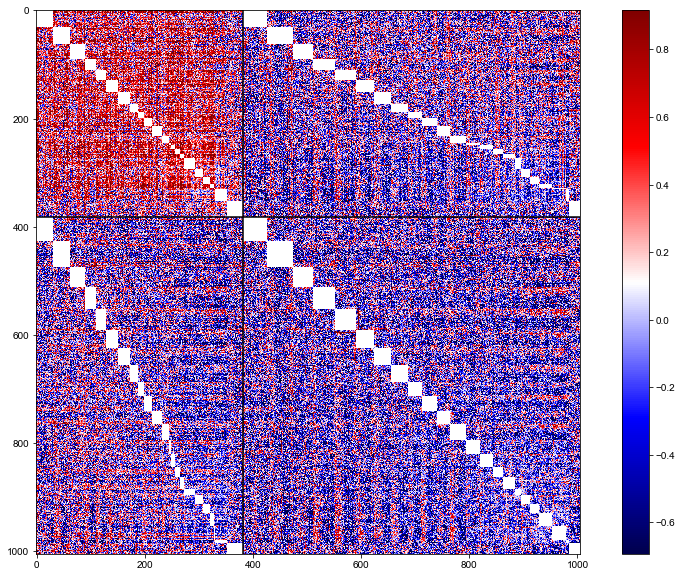

In [7]:
#Number of regions/chromosome
lens = [76, 80, 66, 63, 60, 55, 53, 48, 40, 43, 44, 44, 33, 30, 31, 30, 33, 33, 33, 33, 31, 31, 51]
edges = np.cumsum([0]+lens)
#AB identity
AB = 'B,B,A,A,B,B,A,A,A,B,A,A,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,A,B,B,B,B,B,B,B,B,A,nan,A,A,A,B,A,B,A,B,A,B,A,B,A,A,A,B,B,B,A,A,A,B,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,B,B,B,A,A,B,A,B,A,A,B,B,B,A,B,B,A,B,A,B,A,B,B,B,B,B,nan,A,B,A,B,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,B,B,A,B,B,A,A,A,B,B,A,B,A,A,B,B,A,B,B,B,B,A,A,B,A,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,A,B,B,A,A,A,B,B,A,B,B,A,A,B,B,B,B,B,A,B,nan,B,A,A,B,A,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,B,B,B,A,B,B,A,A,B,B,B,A,A,B,B,nan,A,A,B,B,B,B,B,B,B,B,B,A,B,B,B,A,B,B,B,B,A,B,A,A,A,B,B,B,A,A,B,B,A,B,B,A,B,B,B,B,B,A,B,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,A,B,B,nan,B,A,A,B,B,A,B,A,B,A,A,A,B,B,A,A,B,B,B,B,B,B,B,B,A,B,B,B,A,A,B,A,B,A,B,B,B,B,B,B,B,B,A,A,A,B,B,A,A,A,A,B,B,A,A,A,B,A,B,B,B,A,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,B,A,A,B,B,B,B,B,A,A,A,B,A,A,A,A,B,B,B,B,B,B,B,A,B,B,B,B,B,B,B,A,A,A,B,A,A,A,B,B,B,nan,B,A,B,B,A,A,A,A,B,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,A,A,B,B,B,B,B,B,B,B,B,A,B,B,A,B,B,B,A,B,B,A,A,nan,A,B,A,B,B,B,B,A,A,B,B,A,B,B,B,B,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,A,nan,B,B,B,B,B,B,B,B,A,B,B,A,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,A,B,B,B,A,B,A,A,A,B,B,B,A,A,B,nan,A,nan,A,B,B,B,B,B,A,A,A,A,B,B,A,B,A,B,B,A,B,B,B,B,B,B,B,B,B,B,A,B,A,A,B,B,B,A,B,B,A,A,B,B,B,A,nan,B,B,B,A,A,A,A,A,B,B,B,B,A,A,B,B,A,B,A,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,B,A,B,B,nan,B,B,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,A,A,B,B,B,A,B,B,B,B,B,A,B,B,A,nan,A,A,B,B,B,B,B,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,B,B,B,A,B,A,B,B,B,B,B,B,B,B,A,A,nan,nan,B,B,B,B,A,B,A,A,B,A,B,B,B,B,B,A,A,A,B,A,A,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,nan,B,B,B,A,B,B,B,A,A,B,B,B,B,B,A,A,A,A,A,B,B,B,A,A,B,nan,B,A,B,B,A,A,A,A,A,A,B,B,B,A,A,A,A,B,B,A,A,A,A,B,B,B,A,A,B,nan,nan,A,A,B,B,B,B,A,B,A,B,A,B,B,B,A,A,B,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,B,A,A,B,B,nan,nan,B,B,B,B,B,B,A,A,A,A,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,B,B,B,B,B,nan,nan,nan,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,A,nan,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,A,B,B,B,B,B,B,A,A,nan,nan,nan,nan,B,A,A,A,A,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,nan,A,A,A,A,A,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B'
AB=np.array(AB.split(','))
A,B = AB=='A',AB=='B'

#contact probability derived from imaging
logim = np.log(im_fr[:,:,1])
logim_o = logim.copy()
for ic in range(len(edges)-1):
    logim_o[edges[ic]:edges[ic+1],edges[ic]:edges[ic+1]]=np.nan
logim_o[np.isinf(logim_o)]=np.nan


for il in range(len(edges)-1):
    for jl in range(len(edges)-1):
        logim_o[edges[il]:edges[il+1],edges[jl]:edges[jl+1]]-=np.nanmedian(logim_o[edges[il]:edges[il+1],edges[jl]:edges[jl+1]])
        pass
logim_ord = np.concatenate([np.concatenate([logim_o[A,:][:,A],logim_o[B,:][:,A]]),
                np.concatenate([logim_o[A,:][:,B],logim_o[B,:][:,B]])],axis=-1)    

fig = plt.figure(figsize=(15,10))
edgeA = np.sum(A)
plt.plot([edgeA,edgeA],[0,len(logim_ord)],'k')
plt.plot([0,len(logim_ord)],[edgeA,edgeA],'k')
plt.imshow(logim_ord,cmap='seismic',vmax=np.log(2.5),vmin=np.log(0.5))#,vmin=-8.25,vmax=-3.5)
plt.colorbar()

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


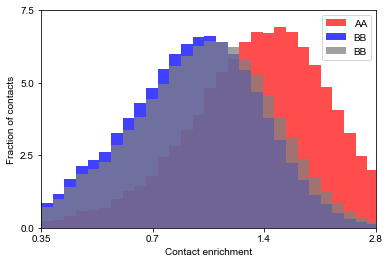

In [8]:
AA = logim_ord[:edgeA,:edgeA].ravel()
AA = AA[~np.isnan(AA)]
fig = plt.figure()
h1 = plt.hist(AA,bins=np.linspace(-2.5,1.05,50),normed=True,alpha=0.7,color='r',label='AA');
BB = logim_ord[edgeA:,edgeA:].ravel()
BB = BB[~np.isnan(BB)]
h2 = plt.hist(BB,bins=np.linspace(-2.5,1.05,50),normed=True,alpha=0.75,color='b',label='BB');

AB = logim_ord[edgeA:,:edgeA].ravel()
AB = AB[~np.isnan(AB)]
plt.hist(AB,bins=np.linspace(-2.5,1.05,50),normed=True,alpha=0.75,color='gray',label='BB');

plt.xlim([-1,1])

np.max(h2[0])
1./np.sum(h2[0])
yvals = [0,0.025,0.05,0.075]
plt.yticks(np.array(yvals)*np.sum(h2[0]),np.array(yvals)*100)

xvals = np.round(np.exp(np.linspace(-1,1,4)),1)
xvals = [0.35,0.7,1.4,2.8]
plt.xticks(np.log(xvals),xvals)
plt.xlabel("Contact enrichment")
plt.ylabel("Fraction of contacts")
plt.legend()


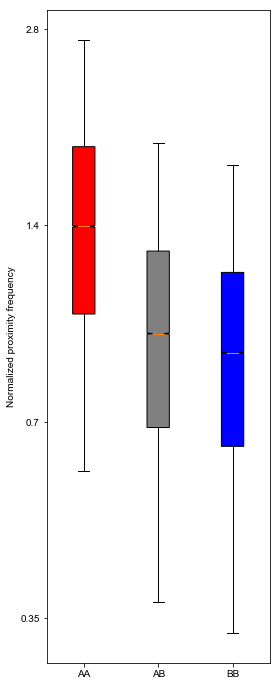

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,12))
labels = ['AA','AB','BB']
#data = [np.exp(AA),np.exp(AB),np.exp(BB)]
data = [AA,AB,BB]
bplot = axes.boxplot(data,showfliers=False,patch_artist=True,labels=labels,notch=True,whis =[5,95])
colors = ['red','grey','blue']
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
ticks_ = [0.35,0.7,1.4,2.8]
plt.yticks(np.log(ticks_),map(str,ticks_))
plt.ylabel('Normalized proximity frequency')
#plt.title('Medians AA,AB,BB: '+str(list(np.round([np.exp(np.median(AA)),np.exp(np.median(AB)),np.exp(np.median(BB))],2))))
plt.show()


### 3. Calculate A and B densities in amanitin-treated cells

In [ ]:
### Main function for calculating trans densities.
def zxy_to_dens(zxy,deltas = [0.5],rgmed=5.8):# [0.1,0.25,0.5,0.75,1]
    """
    This computes the trans densities of A and B for each locus.
    It takes a list of cells with positions (in um), 
    and a list of cutoff distances (in um) 
    and a radius of gyration for normalizing to. This is the median radius of gyration of all spots across all cels.
    """
    
    import numpy as np
    from scipy.spatial.distance import pdist, squareform,cdist
    AB = 'B,B,A,A,B,B,A,A,A,B,A,A,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,A,B,B,B,B,B,B,B,B,A,nan,A,A,A,B,A,B,A,B,A,B,A,B,A,A,A,B,B,B,A,A,A,B,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,B,B,B,A,A,B,A,B,A,A,B,B,B,A,B,B,A,B,A,B,A,B,B,B,B,B,nan,A,B,A,B,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,B,B,A,B,B,A,A,A,B,B,A,B,A,A,B,B,A,B,B,B,B,A,A,B,A,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,A,B,B,A,A,A,B,B,A,B,B,A,A,B,B,B,B,B,A,B,nan,B,A,A,B,A,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,B,B,B,A,B,B,A,A,B,B,B,A,A,B,B,nan,A,A,B,B,B,B,B,B,B,B,B,A,B,B,B,A,B,B,B,B,A,B,A,A,A,B,B,B,A,A,B,B,A,B,B,A,B,B,B,B,B,A,B,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,A,B,B,nan,B,A,A,B,B,A,B,A,B,A,A,A,B,B,A,A,B,B,B,B,B,B,B,B,A,B,B,B,A,A,B,A,B,A,B,B,B,B,B,B,B,B,A,A,A,B,B,A,A,A,A,B,B,A,A,A,B,A,B,B,B,A,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,B,A,A,B,B,B,B,B,A,A,A,B,A,A,A,A,B,B,B,B,B,B,B,A,B,B,B,B,B,B,B,A,A,A,B,A,A,A,B,B,B,nan,B,A,B,B,A,A,A,A,B,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,A,A,B,B,B,B,B,B,B,B,B,A,B,B,A,B,B,B,A,B,B,A,A,nan,A,B,A,B,B,B,B,A,A,B,B,A,B,B,B,B,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,A,nan,B,B,B,B,B,B,B,B,A,B,B,A,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,A,B,B,B,A,B,A,A,A,B,B,B,A,A,B,nan,A,nan,A,B,B,B,B,B,A,A,A,A,B,B,A,B,A,B,B,A,B,B,B,B,B,B,B,B,B,B,A,B,A,A,B,B,B,A,B,B,A,A,B,B,B,A,nan,B,B,B,A,A,A,A,A,B,B,B,B,A,A,B,B,A,B,A,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,B,A,B,B,nan,B,B,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,A,A,B,B,B,A,B,B,B,B,B,A,B,B,A,nan,A,A,B,B,B,B,B,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,B,B,B,A,B,A,B,B,B,B,B,B,B,B,A,A,nan,nan,B,B,B,B,A,B,A,A,B,A,B,B,B,B,B,A,A,A,B,A,A,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,nan,B,B,B,A,B,B,B,A,A,B,B,B,B,B,A,A,A,A,A,B,B,B,A,A,B,nan,B,A,B,B,A,A,A,A,A,A,B,B,B,A,A,A,A,B,B,A,A,A,A,B,B,B,A,A,B,nan,nan,A,A,B,B,B,B,A,B,A,B,A,B,B,B,A,A,B,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,B,A,A,B,B,nan,nan,B,B,B,B,B,B,A,A,A,A,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,B,B,B,B,B,nan,nan,nan,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,A,nan,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,A,B,B,B,B,B,B,A,A,nan,nan,nan,nan,B,A,A,A,A,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,nan,A,A,A,A,A,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B'
    AB=np.array(AB.split(','))
    lens = [76, 80, 66, 63, 60, 55, 53, 48, 40, 43, 44, 44, 33, 30, 31, 30, 33, 33, 33, 33, 31, 31, 51]
    edges = np.cumsum([0]+lens)
    A,B = AB=='A',AB=='B'

    A,B = np.concatenate([A,A]),np.concatenate([B,B])
    A = np.where(A)[0]
    B = np.where(B)[0]
    dic_densA = [] #A density with the cells
    dic_densB = [] #B density with the cells
    dic_densA_norm = [] #normalized A density with the cells normalized to have the same scale (rg)
    dic_densB_norm = [] #normalized A density with the cells normalized to have the same scale (rg)

    M = squareform(pdist(zxy))
    rg = np.sqrt(np.nanmean(np.sum((zxy-np.nanmean(zxy,axis=0))**2,-1),-1))
    
    #exclude cis
    for i in range(len(lens)):
        M[edges[i]:edges[i+1],edges[i]:edges[i+1]]=np.nan
        M[edges[-1]+edges[i]:edges[-1]+edges[i+1],edges[-1]+edges[i]:edges[-1]+edges[i+1]]=np.nan

    MB,MA=M[:,B]**2,M[:,A]**2
    rgmed_rg_sq = (rgmed/rg)**2
    for delta in deltas:
        deltasq = 2*delta**2
        Bdens_,Adens_ = np.nansum(np.exp(-MB/deltasq*rgmed_rg_sq),axis=-1),np.nansum(np.exp(-MA/deltasq*rgmed_rg_sq),axis=-1)
        dic_densA_norm.append(Adens_)
        dic_densB_norm.append(Bdens_)
        Bdens_,Adens_ = np.nansum(np.exp(-MB/deltasq),axis=-1),np.nansum(np.exp(-MA/deltasq),axis=-1)
        dic_densA.append(Adens_)
        dic_densB.append(Bdens_)
    
    ### calculate for random A/B asigment
    
    AB = AB[np.random.permutation(len(AB))]
    A,B = AB=='A',AB=='B'
    A,B = np.concatenate([A,A]),np.concatenate([B,B])
    A = np.where(A)[0]
    B = np.where(B)[0]
    
    dic_densA_random = []
    dic_densB_random = []
    dic_densA_norm_random = []
    dic_densB_norm_random = []
    print M.shape,B.shape,A.shape
    MB,MA=M[:,B]**2,M[:,A]**2
    rgmed_rg_sq = (rgmed/rg)**2
    for delta in deltas:
        deltasq = 2*delta**2
        Bdens_,Adens_ = np.nansum(np.exp(-MB/deltasq*rgmed_rg_sq),axis=-1),np.nansum(np.exp(-MA/deltasq*rgmed_rg_sq),axis=-1)
        dic_densA_norm_random.append(Adens_)
        dic_densB_norm_random.append(Bdens_)
        Bdens_,Adens_ = np.nansum(np.exp(-MB/deltasq),axis=-1),np.nansum(np.exp(-MA/deltasq),axis=-1)
        dic_densA_random.append(Adens_)
        dic_densB_random.append(Bdens_)
    
    return dic_densA,dic_densB,dic_densA_norm,dic_densB_norm,dic_densA_random,dic_densB_random,dic_densA_norm_random,dic_densB_norm_random

#### Run the density analysis

Note: This is slow, so I recommend running it in parallel using ipyparallel

First start a terminal in jupyter:
Got to:
http://localhost:8888/tree and click new>Terminal

and then input: >ipcluster start -n 40 

In [ ]:
import ipyparallel as ipp
from ipyparallel import Client
rc = Client()
print(len(rc))

start = time.time()
res = rc[:40].map_sync(zxy_to_dens,zxy)
end = time.time()
print(end-start)
res =np.array(res)
np.save(save_data+r'\densityIMR90Amanitin.npy',res)

### 4. Calculate the average A/B density ratio across regions

In [ ]:
res = np.load(save_data+r'\densityIMR90Amanitin.npy')

In [ ]:
keep = slice(None)
#res = resWT
AD = res[keep,0,0,:]
BD = res[keep,1,0,:]
Ad = np.nanmedian(AD.reshape([-1,1041]),0)
Bd = np.nanmedian(BD.reshape([-1,1041]),0)
ABratio = AD/BD
ABratio = np.nanmedian(ABratio.reshape([-1,1041]),0)

AD_rnd = res[keep,4,0,:]
BD_rnd = res[keep,5,0,:]
Ad_rnd = np.nanmedian(AD_rnd.reshape([-1,1041]),0)
Bd_rnd = np.nanmedian(BD_rnd.reshape([-1,1041]),0)
ABratio_rnd = AD_rnd/BD_rnd
ABratio_rnd = np.nanmedian(ABratio_rnd.reshape([-1,1041]),0)

AB = 'B,B,A,A,B,B,A,A,A,B,A,A,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,A,B,B,B,B,B,B,B,B,A,nan,A,A,A,B,A,B,A,B,A,B,A,B,A,A,A,B,B,B,A,A,A,B,B,A,B,B,A,B,B,B,B,B,B,B,A,B,B,A,A,B,B,B,A,A,B,A,B,A,A,B,B,B,A,B,B,A,B,A,B,A,B,B,B,B,B,nan,A,B,A,B,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,B,B,A,B,B,A,A,A,B,B,A,B,A,A,B,B,A,B,B,B,B,A,A,B,A,B,A,B,B,A,B,B,B,B,A,B,B,A,B,A,A,B,B,A,A,A,B,B,A,B,B,A,A,B,B,B,B,B,A,B,nan,B,A,A,B,A,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,B,B,B,A,B,B,A,A,B,B,B,A,A,B,B,nan,A,A,B,B,B,B,B,B,B,B,B,A,B,B,B,A,B,B,B,B,A,B,A,A,A,B,B,B,A,A,B,B,A,B,B,A,B,B,B,B,B,A,B,A,B,A,B,B,A,B,B,B,B,B,B,B,A,B,A,B,B,nan,B,A,A,B,B,A,B,A,B,A,A,A,B,B,A,A,B,B,B,B,B,B,B,B,A,B,B,B,A,A,B,A,B,A,B,B,B,B,B,B,B,B,A,A,A,B,B,A,A,A,A,B,B,A,A,A,B,A,B,B,B,A,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,B,A,A,B,B,B,B,B,A,A,A,B,A,A,A,A,B,B,B,B,B,B,B,A,B,B,B,B,B,B,B,A,A,A,B,A,A,A,B,B,B,nan,B,A,B,B,A,A,A,A,B,B,A,B,A,A,A,A,B,B,A,B,B,B,A,B,A,A,B,B,B,B,B,B,B,B,B,A,B,B,A,B,B,B,A,B,B,A,A,nan,A,B,A,B,B,B,B,A,A,B,B,A,B,B,B,B,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,A,nan,B,B,B,B,B,B,B,B,A,B,B,A,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,A,B,A,A,B,B,A,A,A,A,B,B,B,A,B,A,A,A,B,B,B,A,A,B,nan,A,nan,A,B,B,B,B,B,A,A,A,A,B,B,A,B,A,B,B,A,B,B,B,B,B,B,B,B,B,B,A,B,A,A,B,B,B,A,B,B,A,A,B,B,B,A,nan,B,B,B,A,A,A,A,A,B,B,B,B,A,A,B,B,A,B,A,B,A,B,A,B,B,B,B,A,A,B,B,B,B,B,B,A,B,B,nan,B,B,B,A,A,A,A,B,B,A,B,B,B,A,B,B,B,A,A,B,B,B,A,B,B,B,B,B,A,B,B,A,nan,A,A,B,B,B,B,B,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,A,A,B,B,B,B,A,B,A,B,B,B,B,B,B,B,B,A,A,nan,nan,B,B,B,B,A,B,A,A,B,A,B,B,B,B,B,A,A,A,B,A,A,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,B,B,A,B,B,nan,B,B,B,A,B,B,B,A,A,B,B,B,B,B,A,A,A,A,A,B,B,B,A,A,B,nan,B,A,B,B,A,A,A,A,A,A,B,B,B,A,A,A,A,B,B,A,A,A,A,B,B,B,A,A,B,nan,nan,A,A,B,B,B,B,A,B,A,B,A,B,B,B,A,A,B,B,B,A,A,B,A,A,A,A,A,A,B,B,A,B,A,B,A,A,B,B,nan,nan,B,B,B,B,B,B,A,A,A,A,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,B,B,B,B,B,nan,nan,nan,A,A,A,B,B,B,B,B,B,A,B,B,B,B,B,B,A,nan,B,B,nan,nan,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,A,B,B,B,B,B,B,A,A,nan,nan,nan,nan,B,A,A,A,A,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,nan,A,A,A,A,A,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B'
AB=np.array(AB.split(','))
lens = [76, 80, 66, 63, 60, 55, 53, 48, 40, 43, 44, 44, 33, 30, 31, 30, 33, 33, 33, 33, 31, 31, 51]
edges = np.cumsum([0]+lens)
A,B = AB=='A',AB=='B'


xmin,xmax,nbins=0.5,1,23


fig = plt.figure()
dif = ABratio[A]
dif = dif[(~np.isnan(dif))&(~np.isinf(dif))]
ct1=plt.hist(dif,bins=np.linspace(xmin,xmax,nbins),normed=True,color='r',alpha=0.75)
print('A',np.nanmedian(dif))


dif = ABratio[B]
dif = dif[(~np.isnan(dif))&(~np.isinf(dif))]
print('B',np.nanmedian(dif))
ct2=plt.hist(dif,bins=np.linspace(xmin,xmax,nbins),normed=True,color='b',alpha=0.75)


dif = ABratio_rnd#[A]
dif = dif[(~np.isnan(dif))&(~np.isinf(dif))]
dif_rnd=dif.copy()
ct1=plt.hist(dif,bins=np.linspace(xmin,xmax,nbins),normed=True,color='k',alpha=0.75)
print('Rnd',np.nanmedian(dif))
xvals=[0.5,0.75,1]
plt.xticks(xvals,xvals)
yvals = np.array([0,0.10,0.20])
plt.yticks(np.array(yvals)*np.sum(ct2[0]),(yvals*100).astype(int))
plt.xlabel("Median A/B density ratio")
plt.ylabel("% of loci")
plt.ylim([0,np.max(np.array(yvals)*np.sum(ct2[0]))])

### 5. Calculate the change in association rates to lamina/speckles upon treatement with amanitin

#### Load amanitin data

In [11]:
folder = data_folder
experiment = []
fid = open(folder+os.sep+r'genomic-scale-amanitin.tsv','r')
lines = np.array([ln[:-1].split('\t')for ln in fid if len(ln)>0])
fid.close()
zxy = np.array(lines[1:,:3][:],dtype=np.float)
zxy = zxy.reshape([-1,2082,3])/1000 #transform to um
zxy_amanitin = zxy.copy()
head = list(lines[0])
experimentAm = np.array(lines[1::2082,head.index('experiment number')].astype(int))
experiment_Am = np.array(lines[1::1041,head.index('experiment number')].astype(int))
lines_Am=lines.copy()

In [12]:
good_amanitin = (~np.isnan(zxy_amanitin[:,:,0])).reshape([-1,1041])[experiment_Am==1]
tot_distsNUC_amanitin_ = np.array(lines_Am[1:,-2],dtype=np.float).reshape([-1,1041])[experiment_Am==1]/1000
tot_distsSC_amanitin_ = np.array(lines_Am[1:,-1],dtype=np.float).reshape([-1,1041])[experiment_Am==1]/1000
tot_distsLAM_amanitin_ = np.array(lines_Am[1:,-3],dtype=np.float).reshape([-1,1041])[experiment_Am==1]/1000

nuc_cutoff = 0.25
frLAM_Am = 1.*np.sum(tot_distsLAM_amanitin_<nuc_cutoff,0)/np.sum(good_amanitin&(~np.isnan(tot_distsLAM_amanitin_)),0)
frNUC_Am = 1.*np.sum(tot_distsNUC_amanitin_<nuc_cutoff,0)/np.sum(good_amanitin&(~np.isnan(tot_distsNUC_amanitin_)),0)
frSC_Am = 1.*np.sum(tot_distsSC_amanitin_<nuc_cutoff,0)/np.sum(good_amanitin&(~np.isnan(tot_distsSC_amanitin_)),0)

dLAM_Am = np.nanmedian(tot_distsLAM_amanitin_,axis=0)
dSC_Am = np.nanmedian(tot_distsSC_amanitin_,axis=0)
dNUC_Am = np.nanmedian(tot_distsNUC_amanitin_,axis=0)

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


#### Load untreated data

In [13]:
folder = data_folder
fid = open(folder+os.sep+r'genomic-scale-with transcription and nuclear bodies.tsv','r')
lines = np.array([ln[:-1].split('\t')for ln in fid if len(ln)>0])
zxy = np.array(lines[1:,:3][:],dtype=np.float)
zxy = zxy.reshape([-1,2082,3])/1000 #transform to um
head = list(lines[0])
experiment = np.array(lines[1::2082,head.index('experiment number')].astype(int))-3
experiment_ = np.array(lines[1::1041,head.index('experiment number')].astype(int))-3

In [14]:
good_WT = (~np.isnan(zxy[:,:,0])).reshape([-1,1041])
tot_distsNUC_WT_ = np.array(lines[1:,-2],dtype=np.float).reshape([-1,1041])/1000
tot_distsSC_WT_ = np.array(lines[1:,-1],dtype=np.float).reshape([-1,1041])/1000
tot_distsLAM_WT_ = np.array(lines[1:,-3],dtype=np.float).reshape([-1,1041])/1000

nuc_cutoff = 0.25
frLAM_WT = 1.*np.sum(tot_distsLAM_WT_<nuc_cutoff,0)/np.sum(good_WT,0)
frNUC_WT = 1.*np.sum(tot_distsNUC_WT_<nuc_cutoff,0)/np.sum(good_WT,0)
frSC_WT = 1.*np.sum(tot_distsSC_WT_<nuc_cutoff,0)/np.sum(good_WT,0)

dLAM_WT = np.nanmedian(tot_distsLAM_WT_,axis=0)
dSC_WT = np.nanmedian(tot_distsSC_WT_,axis=0)
dNUC_WT = np.nanmedian(tot_distsNUC_WT_,axis=0)

C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
C:\Users\Bogdan\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


Text(0,0.5,'Fold change in association rate')

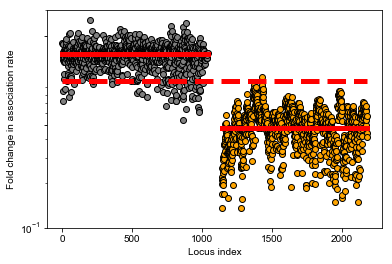

In [15]:
plt.figure()
plt.semilogy(frLAM_Am/frLAM_WT,'o',mec='k',color='gray')
x_SC = np.arange(len(frSC_Am))+len(frLAM_Am)+100
plt.semilogy(x_SC,frSC_Am/frSC_WT,'o',mec='k',color='orange')
plt.plot([0,len(frLAM_Am)],[np.nanmedian(frLAM_Am/frLAM_WT,)]*2,lw=5,color='r')
plt.plot([np.min(x_SC),np.max(x_SC)],[np.nanmedian(frSC_Am/frSC_WT,)]*2,lw=5,color='r')
plt.plot([0,np.max(x_SC)],[1,1],'r--',lw=5)
plt.ylim([0.1,3])
plt.yticks([0.1,0.5,2])
plt.xlabel('Locus index')
plt.ylabel('Fold change in association rate')